In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
file_path = "/Users/danielseymour/Downloads/pwt1001.dta"

# Load the .dta file into a pandas DataFrame
df = pd.read_stata(file_path)

# Display the first 5 rows
df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display all column headers
df.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

In [4]:
df['labsh'].describe()  # Shows the first 5 values

count    7970.000000
mean        0.533230
std         0.124724
min         0.089657
25%         0.455200
50%         0.537162
75%         0.622856
max         0.902989
Name: labsh, dtype: float64

In [5]:
labour_share_by_year = df.groupby('year')['labsh'].mean()
labour_share_by_year.head()

year
1950    0.588661
1951    0.585933
1952    0.587400
1953    0.587890
1954    0.586416
Name: labsh, dtype: float32

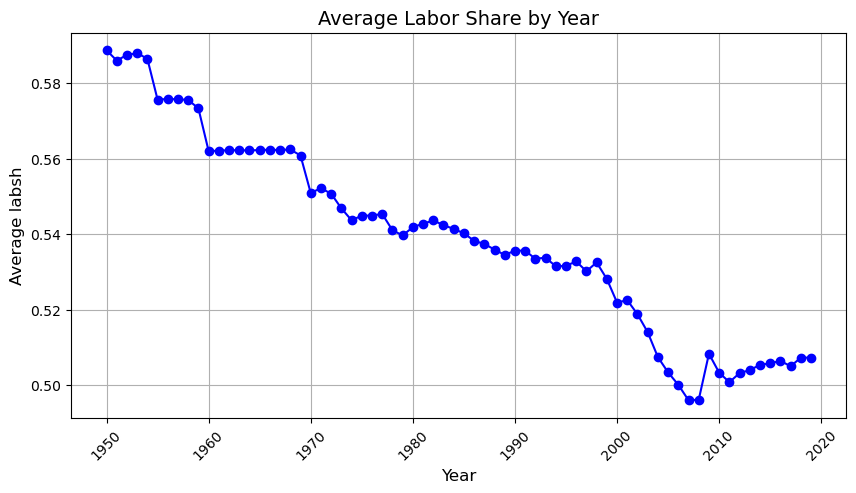

In [6]:
# Create the plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(labour_share_by_year.index, labour_share_by_year.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Average Labor Share by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average labsh', fontsize=12)
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

Average Labor Share by Year = the fraction of national income that goes to labor, including wages, salaries, and benefits, as opposed to capital (profits, rents, etc.).

Plot shows a decrease from 0.59 in 1950 to 0.505 in 2020

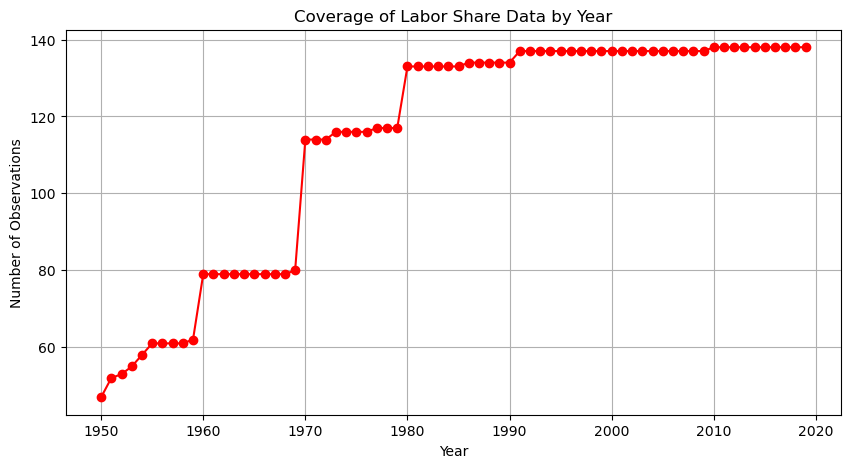

In [7]:
# Count the number of non-missing labsh values per year
coverage_by_year = df.groupby('year')['labsh'].count()

plt.figure(figsize=(10, 5))
plt.plot(coverage_by_year.index, coverage_by_year.values, marker='o', linestyle='-', color='r')
plt.title('Coverage of Labor Share Data by Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

The effect of using an average when coverage is rising rapidly over time (especially from 1950 to 1980) is that there is a selection bias where the countries who join over time have a lower labour share than the average of the countries where data was already being recorded. These countries that start to record the data later are more likely to be developing countries where workers systematically receive a lower share of national output.  

A way to deal with this is to only look at the countries that have had data recorded from 1950 to 2020, and exclude all countries who had no data then. 

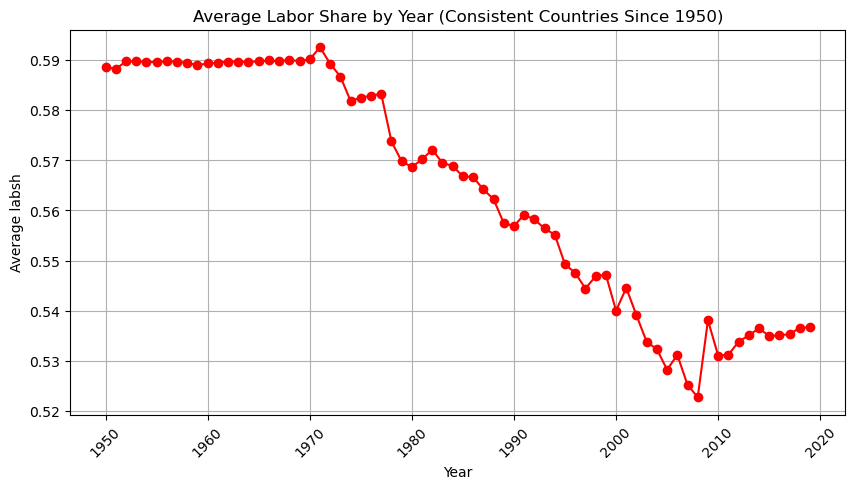

In [14]:
import matplotlib.pyplot as plt

# Get a list of countries that have a non-NaN `labsh` value in 1950
countries_with_1950_data = df[(df['year'] == 1950) & (~df['labsh'].isna())]['country'].unique()

# Keep only these countries in the entire dataset
consistent_countries_df = df[df['country'].isin(countries_with_1950_data)]

# Group by year and compute the mean of `labsh`
labour_share_filtered = consistent_countries_df.groupby('year')['labsh'].mean()

# Plot the filtered data
plt.figure(figsize=(10, 5))
plt.plot(labour_share_filtered.index, labour_share_filtered.values, marker='o', linestyle='-', color='red')

# Customize the plot
plt.title('Average Labor Share by Year (Consistent Countries Since 1950)')
plt.xlabel('Year')
plt.ylabel('Average labsh')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [15]:
print(len(countries_with_1950_data))  # Number of countries included

47


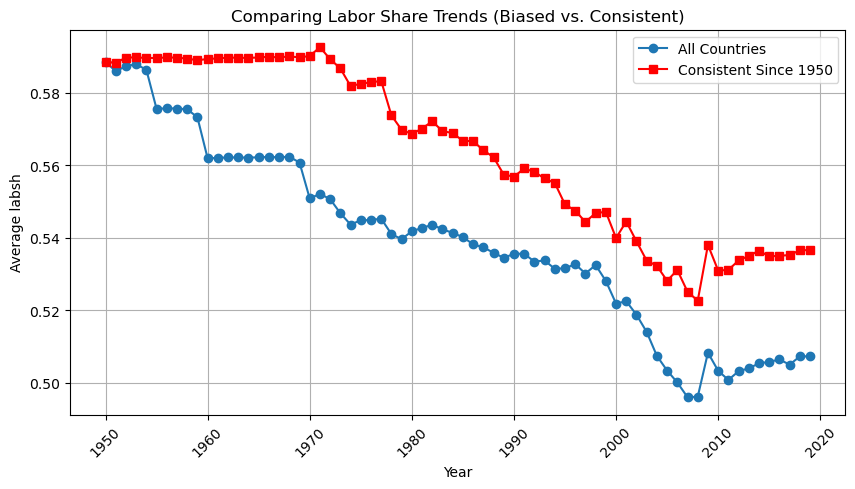

In [16]:
# Compute original trend (all countries)
labour_share_original = df.groupby('year')['labsh'].mean()

# Plot both trends
plt.figure(figsize=(10, 5))
plt.plot(labour_share_original.index, labour_share_original.values, marker='o', linestyle='-', label="All Countries")
plt.plot(labour_share_filtered.index, labour_share_filtered.values, marker='s', linestyle='-', label="Consistent Since 1950", color='red')

# Customize the plot
plt.title('Comparing Labor Share Trends (Biased vs. Consistent)')
plt.xlabel('Year')
plt.ylabel('Average labsh')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

This shows that there is a selection effect. My earlier hypothesis that higher income countries have a higher labour share was correct. 

However, it's interesting to note that the steepness of the trend is the same, but that higher income countries have a higher starting level of labour share. 

A more comprehensive analysis would group countries by cohorts based off when labour share began being recorded, and plot the trends for each cohort. 